O dataset escolhido para esse notebook é o de dados de previsão de AVC que pode ser encontrado através do link abaixo:
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Contexto
Segundo a Organização Mundial da Saúde (OMS), o AVC é a 2ª principal causa de morte no mundo, responsável por aproximadamente 11% do total de mortes.
Este conjunto de dados é usado para prever se um paciente tem probabilidade de sofrer um derrame com base nos parâmetros de entrada, como sexo, idade, várias doenças e tabagismo. Cada linha nos dados fornece informações relevantes sobre o paciente.

Informações do atributo
1) id: identificador único
2) gender: "Male", "Female" ou "Other"
3) age: idade do paciente
4) hypertension: 0 se o paciente não tem hipertensão, 1 se o paciente tem hipertensão
5) heart_disease: 0 se o paciente não tiver nenhuma doença cardíaca, 1 se o paciente tiver uma doença cardíaca
6) ever_married: "No" ou "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" ou "Self-employed"
8) Residence_type: "Rural" ou "Urban"
9) avg_glucose_level: nível médio de glicose no sangue
10) bmi: índice de massa corporal
11) smoking_status: "formerly smoked", "never smoked", "smokes" ou "Unknown"*
12) stroke: 1 se o paciente teve AVC ou 0 se não

*Observação: "Unknown" em smoking_status significa que as informações não estão disponíveis para este paciente, ou seja, teremos que lidar com essa informação na etapa de pré processamento.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('../dataset/healthcare-dataset-stroke-data.csv', sep=',', index_col=0, na_values='?')
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [3]:
dataset.info

<bound method DataFrame.info of        gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0             0              1          Yes        Private   
51676  Female  61.0             0              0          Yes  Self-employed   
31112    Male  80.0             0              1          Yes        Private   
60182  Female  49.0             0              0          Yes        Private   
1665   Female  79.0             1              0          Yes  Self-employed   
...       ...   ...           ...            ...          ...            ...   
18234  Female  80.0             1              0          Yes        Private   
44873  Female  81.0             0              0          Yes  Self-employed   
19723  Female  35.0             0              0          Yes  Self-employed   
37544    Male  51.0             0              0          Yes        Private   
44679  F

In [4]:
# elimina as linhas com dados faltantes, além das linhas que apresentam o valor "Unknown" na coluna "smoking_status"
dataset = dataset.dropna(axis=0)
dataset = dataset[dataset['smoking_status'] != 'Unknown']
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0


## Verificando balanceamento das classes

É de suma importância verificar se as classes estão balanceadas. Se há um desbalanceamento grande entre as classes por vezes é indicado utilizar técnicas de pré-processamento para balanceamento das classes, por outras vezes é indicado manter a proporção natural do problema. Porém, o balanceamento ou desbalanceamento de classes influencia qual medida será utilizada na avaliação do classificador, por exemplo a acurácia não é indicada para avaliar problemas onde as classes são desbalanceadas. 

In [5]:
# TODO: Fazer essa verificação de balanceamento

A maior parte dos algoritmos de classificação só trabalham com dados numéricos, por isso é necessário transformar dados categóricos em numéricos.

In [6]:
dataset = pd.get_dummies(dataset)
dataset

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,False,True,False,False,False,True,True,False,False
31112,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
60182,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1665,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
56669,81.0,0,0,186.21,29.0,1,False,True,False,False,...,False,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68398,82.0,1,0,71.97,28.3,0,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
45010,57.0,0,0,77.93,21.7,0,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
44873,81.0,0,0,125.20,40.0,0,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False


Note que na tabela acima o número de atributos aumentou, saindo de 11 colunas, para 21. Agora, todos os atributos não numéricos, tiveram seus valores transformados em atributos.

É importante deixar os atributos numa mesma escala de valor, para que um determinado atributo não tenha maior influência sobre os outros atributos no aprendizado do modelo.

In [7]:
from sklearn.preprocessing import MinMaxScaler
X = dataset.loc[:, dataset.columns != 'num']
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.791667,0.0,1.0,0.801265,0.311801,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.972222,0.0,1.0,0.234512,0.260870,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.541667,0.0,0.0,0.536008,0.284472,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.958333,1.0,0.0,0.549349,0.155280,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.986111,0.0,0.0,0.605161,0.217391,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,1.000000,1.0,0.0,0.077786,0.208696,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3422,0.652778,0.0,0.0,0.105300,0.126708,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3423,0.986111,0.0,0.0,0.323516,0.354037,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3424,0.347222,0.0,0.0,0.128658,0.237267,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Correlação entre atributos

Para realizar a correlação, iremos fazer em pequenas etapas

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

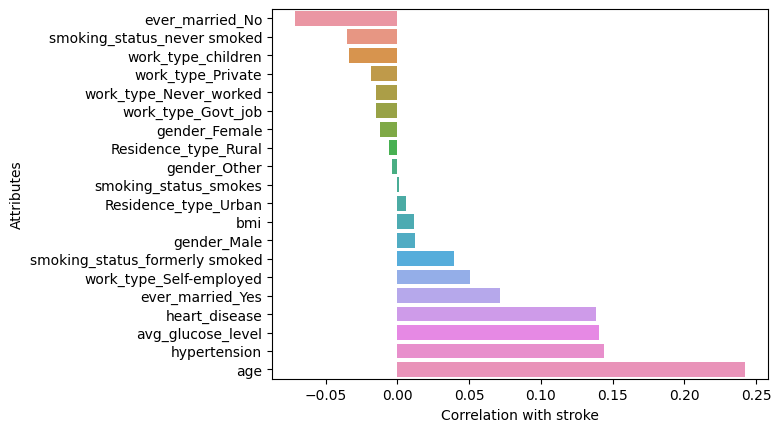

In [37]:
corr = dataset.corr()["stroke"].sort_values(ascending=True)
corr.drop("stroke", inplace=True) 

sns.barplot(x=corr, y=corr.index)
plt.ylabel('Attributes')
plt.xlabel('Correlation with stroke')
plt.show()

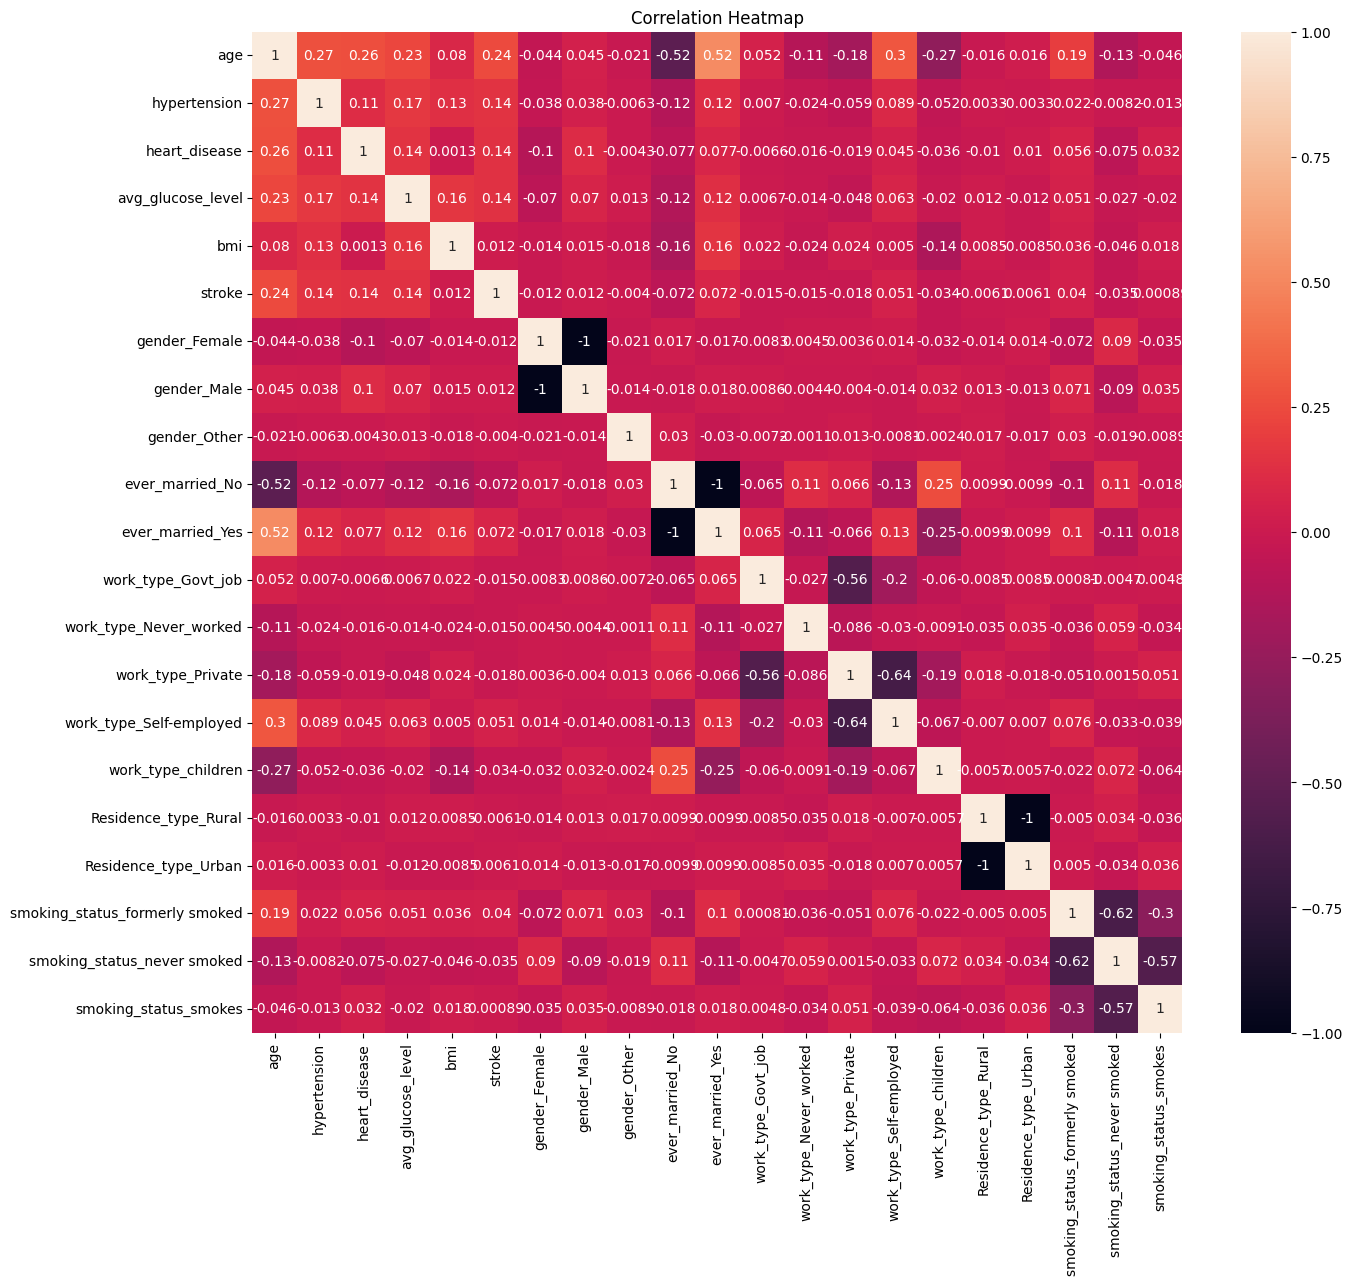

In [63]:
plt.figure(figsize=(15, 13))
sns.heatmap(dataset.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

Talvez podemos utilizar somente o "avg_glucose_level" ao invés de utilizar o "avg_glucose_level", "heart_disease", e "hypertension"
Da mesma forma, podemos utilizar somente o "bmi", ao invés do "bmi" e "gender_Male"

O atributo "age" é o que tem maior correlação com AVC
Podemos representar essa correlação com o histograma abaixo:

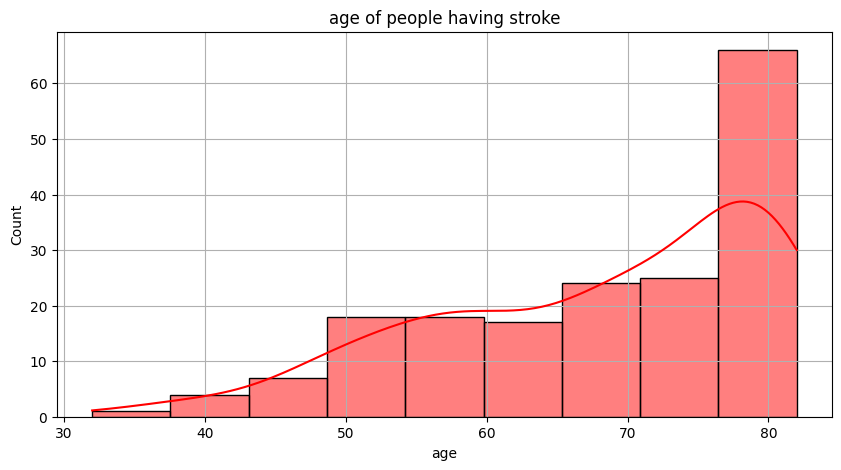

In [45]:
plt.figure(figsize=(10,5))
strokes_dataset = dataset[dataset['stroke'] == 1]
sns.histplot(strokes_dataset['age'], color="red")
plt.title("age of people having stroke")
plt.grid()

Podemos remover algumas colunas, tendo em vista que as mesmas não apresentam uma correlação extremamente baixa

Supostamente, após essa etapa da correlação, finalizamos todo o pré-processamento

## Aplicar o algoritmos de classificação com Árvores de Decisão

In [68]:
# Separando o dataset no conjunto de atributos X e classe y.
X = dataset.loc[:, dataset.columns != 'stroke'] 
y = np.array(dataset.loc[:, dataset.columns == 'stroke']).ravel()

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [70]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, predict)
print(f'A acurácia do Classificador é: {acc :.2%}')

A acurácia do Classificador é: 90.67%


## Aplicar o algoritmos de classificação com K-Nearest Neighbors (KNN)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, parameters, cv=5, scoring='accuracy')
gs.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [73]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004601,4.892602e-04,0.072399,0.063800,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.908163,0.927007,0.906569,0.908029,0.905109,0.910976,0.008092,13
1,0.004400,4.895920e-04,0.008400,0.000490,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.908163,0.927007,0.906569,0.908029,0.905109,0.910976,0.008092,13
2,0.005000,6.321842e-04,0.043000,0.000894,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.940233,0.934307,0.937226,0.940146,0.940146,0.938412,0.002349,11
3,0.005000,1.628244e-06,0.009001,0.000632,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.940233,0.934307,0.935766,0.938686,0.938686,0.937536,0.002167,12
4,0.005399,4.888312e-04,0.043600,0.000801,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.940233,0.941606,0.944526,0.944526,0.937226,0.941623,0.002761,10
5,0.005000,6.326365e-04,0.009600,0.000800,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.940233,0.943066,0.945985,0.943066,0.937226,0.941915,0.002967,9
6,0.004999,6.289914e-07,0.043801,0.001166,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.944606,0.945985,0.945985,0.944526,0.941606,0.944542,0.001600,7
7,0.004999,1.482036e-06,0.010200,0.000400,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.944606,0.944526,0.945985,0.944526,0.943066,0.944542,0.000924,7
8,0.005199,4.006178e-04,0.044801,0.000982,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.947522,0.947445,0.947445,0.944526,0.947445,0.946877,0.001176,4
9,0.005000,6.975526e-07,0.010600,0.000490,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.947522,0.945985,0.947445,0.947445,0.945985,0.946877,0.000728,4


In [74]:
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
12,"{'n_neighbors': 13, 'weights': 'uniform'}",0.947753,0.000577,1
13,"{'n_neighbors': 13, 'weights': 'distance'}",0.947753,0.000577,1
11,"{'n_neighbors': 11, 'weights': 'distance'}",0.947461,0.000031,3
8,"{'n_neighbors': 9, 'weights': 'uniform'}",0.946877,0.001176,4
9,"{'n_neighbors': 9, 'weights': 'distance'}",0.946877,0.000728,4
10,"{'n_neighbors': 11, 'weights': 'uniform'}",0.946877,0.000728,4
6,"{'n_neighbors': 7, 'weights': 'uniform'}",0.944542,0.001600,7
7,"{'n_neighbors': 7, 'weights': 'distance'}",0.944542,0.000924,7
5,"{'n_neighbors': 5, 'weights': 'distance'}",0.941915,0.002967,9
4,"{'n_neighbors': 5, 'weights': 'uniform'}",0.941623,0.002761,10


## Aplicar o algoritmos de classificação com Multilayer Perceptron (MLP)

In [75]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5), (10, 5)],
              'max_iter' : [3000], 'random_state' : [42]}

mlp = MLPClassifier()
gs_mlp = GridSearchCV(mlp, parameters, cv=5, scoring='accuracy')
gs_mlp.fit(X, y)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [5, 8, 15, (5, 3), (8, 5),
                                                (10, 5)],
                         'max_iter': [3000], 'random_state': [42]},
             scoring='accuracy')

In [76]:
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_mlp.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
3,"{'hidden_layer_sizes': (5, 3), 'max_iter': 300...",0.947461,0.000031,1
0,"{'hidden_layer_sizes': 5, 'max_iter': 3000, 'r...",0.946877,0.001480,2
2,"{'hidden_layer_sizes': 15, 'max_iter': 3000, '...",0.946877,0.000728,3
5,"{'hidden_layer_sizes': (10, 5), 'max_iter': 30...",0.945417,0.003414,4
1,"{'hidden_layer_sizes': 8, 'max_iter': 3000, 'r...",0.944833,0.005344,5
4,"{'hidden_layer_sizes': (8, 5), 'max_iter': 300...",0.944249,0.004283,6
